In [1]:
# import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# import data
data = pd.read_csv('parkinsons.data')

In [3]:
# split data to X and y
X = data.drop(['name','status'],axis=1)
# Check unique values in the 'status' column
y = data['status']

In [4]:
# split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [5]:
# scale the numerical features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [6]:
# Define hyperparameter grid for tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [7]:
# Predict on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Confusion Matrix:\n", val_conf_matrix)
print("Validation Classification Report:\n", val_class_report)

Validation Accuracy: 0.86
Validation Confusion Matrix:
 [[ 9  3]
 [ 1 16]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.84      0.94      0.89        17

    accuracy                           0.86        29
   macro avg       0.87      0.85      0.85        29
weighted avg       0.87      0.86      0.86        29



In [8]:
# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

Test Accuracy: 0.93
Test Confusion Matrix:
 [[ 2  1]
 [ 1 26]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.96      0.96      0.96        27

    accuracy                           0.93        30
   macro avg       0.81      0.81      0.81        30
weighted avg       0.93      0.93      0.93        30



[Text(0.4583333333333333, 0.9285714285714286, 'PPE <= 0.104\nentropy = 0.799\nsamples = 136\nvalue = [33, 103]\nclass = 1'),
 Text(0.375, 0.7857142857142857, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = 0'),
 Text(0.5416666666666666, 0.7857142857142857, 'spread1 <= -5.589\nentropy = 0.624\nsamples = 122\nvalue = [19, 103]\nclass = 1'),
 Text(0.4583333333333333, 0.6428571428571429, 'MDVP:Fo(Hz) <= 117.986\nentropy = 0.866\nsamples = 66\nvalue = [19, 47]\nclass = 1'),
 Text(0.25, 0.5, 'Shimmer:DDA <= 0.028\nentropy = 0.863\nsamples = 14\nvalue = [10, 4]\nclass = 0'),
 Text(0.16666666666666666, 0.35714285714285715, 'MDVP:Fo(Hz) <= 109.939\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]\nclass = 0'),
 Text(0.08333333333333333, 0.21428571428571427, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.25, 0.21428571428571427, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.35714285714285715, 'entropy = 0.0\nsamples = 3\nvalue = [

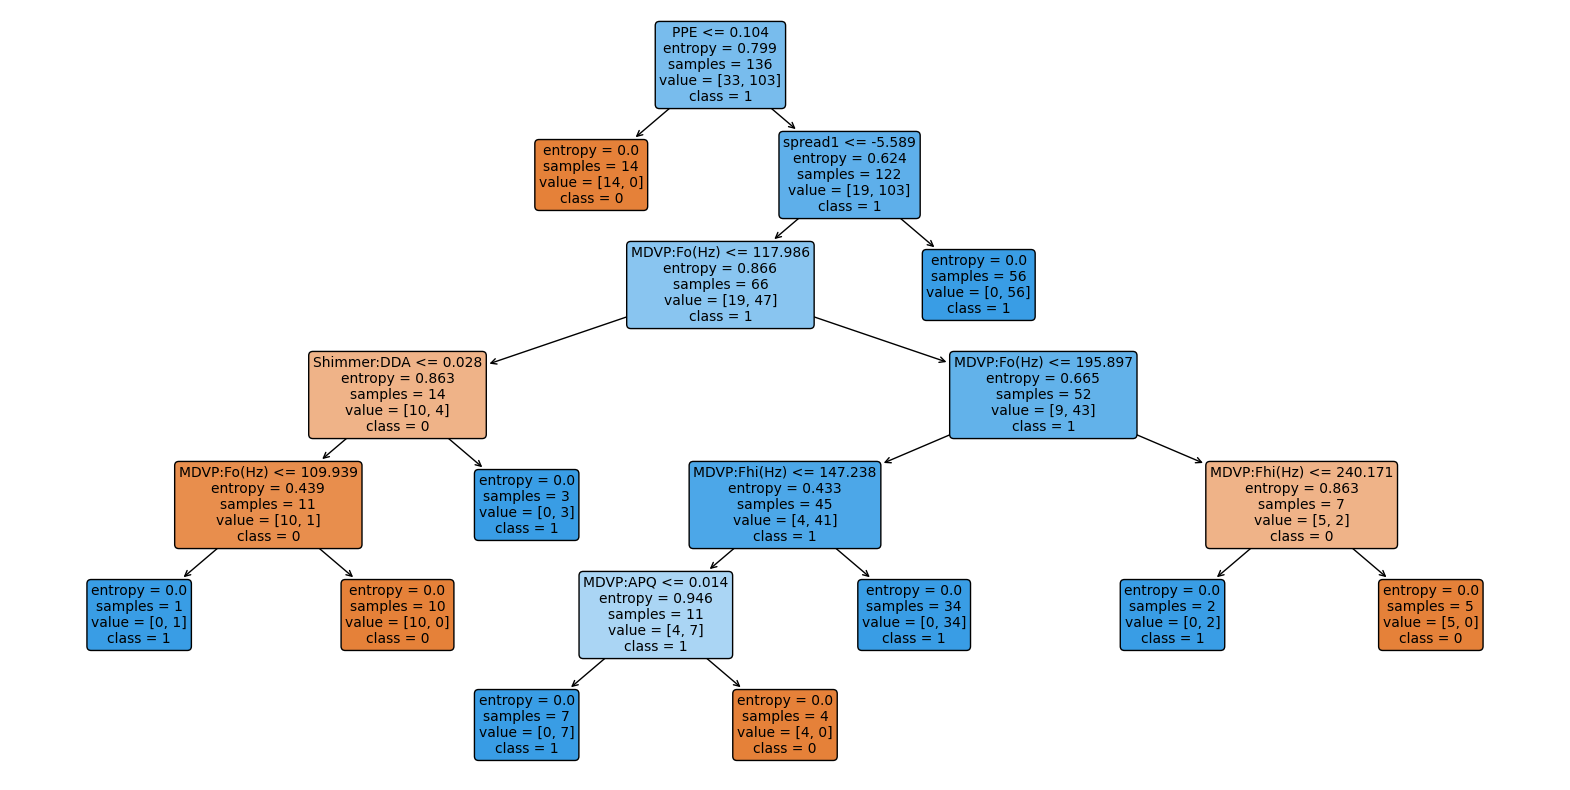

In [12]:
# U svakom čvora stabla naveden je test, zatim vrednost korišćene mere homogenosti, 
# ukupan broj instaci koji je analiziran, kao i broj instanci po klasama. 

plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, fontsize=10, feature_names=list(X.keys()), filled=True, rounded=True, class_names=['0','1'])

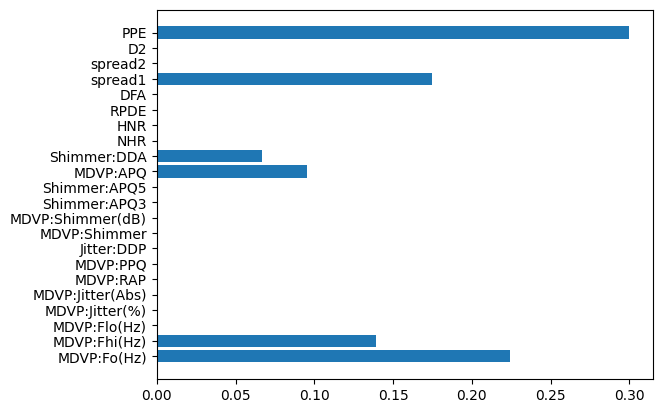

In [13]:
plt.barh(list(X.keys()), best_model.feature_importances_)
plt.show()